>Ярослав, приветствую! Меня зовут Кудрявцев Александр и я буду проверять твой проект :)
>
>Ниже в ноутбуке будут мои комментарии, закодированные разными цветами.
>
>**_<span style="color:green">Зеленым будут выделены места, которые хочется особенно отметить, как хорошие. </span>_**
>
> **_<span style="color:red">Недочеты, откомментированные красным обязательны к доработке – без их исправления домашка не будет зачтена. </span>_**
>  
> **_<span style="color:orange">Недочеты и подсказки, откомментированные оранжевым, учесть желательно, но их доработка не является обязательным условнием для зачета.</span>_**
>
> Если какие-то подзадачи не откомментированны – значит с ними все окей, нет возражений.
>
> Если ошибка влечет за собой дальнейшие неточности рассчетов или выводов – пожалуйста, поправь их тоже, чтобы аналитический отчет был целостным.
>
>Пожалуйста, не удаляй и не переноси мои комментарии, это позволит лучше ориентироваться при возможных повторных проверках.

**upd**

Не знаю как нужно оформлять изменения, поэтому все изменения в части выводов идут после пометки **upd**

Если я где-то менял код, то тоже ставил комментарий #upd

## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
from pymystem3 import Mystem
from collections import Counter

In [2]:
df = pd.read_csv('/datasets/data.csv')

In [3]:
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


children  days_employed  dob_years education  education_id  \
0         1   -8437.673028         42    высшее             0   
1         1   -4024.803754         36   среднее             1   
2         0   -5623.422610         33   Среднее             1   
3         3   -4124.747207         32   среднее             1   
4         0  340266.072047         53   среднее             1   
5         0    -926.185831         27    высшее             0   
6         0   -2879.202052         43    высшее             0   
7         0    -152.779569         50   СРЕДНЕЕ             1   
8         2   -6929.865299         35    ВЫСШЕЕ             0   
9         0   -2188.756445         41   среднее             1   

      family_status  family_status_id gender income_type  debt   total_income  \
0   женат / замужем                 0      F   сотрудник     0  253875.639453   
1   женат / замужем                 0      F   сотрудник     0  112080.014102   
2   женат / замужем                 0      M   сотрудник     0  145885.952297   
3   женат / замужем                 0      M   сотрудник     0  267628.550329   
4  гражданский брак                 1      F   пенсионер     0  158616.077870   
5  гражданский брак                 1      M   компаньон     0  255763.565419   
6   женат / замужем                 0      F   компаньон     0  240525.971920   
7   женат / замужем                 0      M   сотрудник     0  135823.934197   
8  гражданский брак                 1      F   сотрудник     0   95856.832424   
9   женат / замужем                 0      M   сотрудник     0  144425.938277   

                      purpose  
0               покупка жилья  
1     приобретение автомобиля  
2               покупка жилья  
3  дополнительное образование  
4             сыграть свадьбу  
5               покупка жилья  
6           операции с жильем  
7                 образование  
8       на проведение свадьбы  
9     покупка жилья для семьи

In [4]:
df.describe()

children  days_employed     dob_years  education_id  \
count  21525.000000   19351.000000  21525.000000  21525.000000   
mean       0.538908   63046.497661     43.293380      0.817236   
std        1.381587  140827.311974     12.574584      0.548138   
min       -1.000000  -18388.949901      0.000000      0.000000   
25%        0.000000   -2747.423625     33.000000      1.000000   
50%        0.000000   -1203.369529     42.000000      1.000000   
75%        1.000000    -291.095954     53.000000      1.000000   
max       20.000000  401755.400475     75.000000      4.000000   

       family_status_id          debt  total_income  
count      21525.000000  21525.000000  1.935100e+04  
mean           0.972544      0.080883  1.674223e+05  
std            1.420324      0.272661  1.029716e+05  
min            0.000000      0.000000  2.066726e+04  
25%            0.000000      0.000000  1.030532e+05  
50%            0.000000      0.000000  1.450179e+05  
75%            1.000000      0.000000  2.034351e+05  
max            4.000000      1.000000  2.265604e+06

In [5]:
df[df.duplicated() == True].count()

children            54
days_employed        0
dob_years           54
education           54
education_id        54
family_status       54
family_status_id    54
gender              54
income_type         54
debt                54
total_income         0
purpose             54
dtype: int64

In [6]:
print(df.education.value_counts())
print(df.education_id.value_counts())

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64
1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64


In [3]:
df.education = df.education.str.lower()
df.education.value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [8]:
df.family_status.value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [9]:
df[df.days_employed / 365 > df.dob_years].income_type.value_counts()

пенсионер      3443
безработный       2
Name: income_type, dtype: int64

In [10]:
df[df.dob_years == 0].dob_years.count()

101

### Вывод

* В данных есть пропуски в атрибутах days_employed, total_income.
* Во многих столбцах есть некорректные данные. Например, трудовой стаж больше продолжительности жизни, отрицательное количетво детей и т.д. К счастью в задании не сказано обрабатывать подобные ошибки.
* В столбце education записи хранятся в разном регистре. Я привел их в нижний регистр, это позволило найти больше дубликатов в записях.


>**_<span style="color:green">Здесь всё структурировано и по делу, класс. </span>_**
>


### Шаг 2. Предобработка данных

### Обработка пропусков

In [11]:
df[df.total_income.isna() == True]

children  days_employed  dob_years education  education_id  \
12            0            NaN         65   среднее             1   
26            0            NaN         41   среднее             1   
29            0            NaN         63   среднее             1   
41            0            NaN         50   среднее             1   
55            0            NaN         54   среднее             1   
...         ...            ...        ...       ...           ...   
21489         2            NaN         47   среднее             1   
21495         1            NaN         50   среднее             1   
21497         0            NaN         48    высшее             0   
21502         1            NaN         42   среднее             1   
21510         2            NaN         28   среднее             1   

               family_status  family_status_id gender  income_type  debt  \
12          гражданский брак                 1      M    пенсионер     0   
26           женат / замужем                 0      M  госслужащий     0   
29     Не женат / не замужем                 4      F    пенсионер     0   
41           женат / замужем                 0      F  госслужащий     0   
55          гражданский брак                 1      F    пенсионер     1   
...                      ...               ...    ...          ...   ...   
21489        женат / замужем                 0      M    компаньон     0   
21495       гражданский брак                 1      F    сотрудник     0   
21497        женат / замужем                 0      F    компаньон     0   
21502        женат / замужем                 0      F    сотрудник     0   
21510        женат / замужем                 0      F    сотрудник     0   

       total_income                           purpose  
12              NaN                   сыграть свадьбу  
26              NaN                       образование  
29              NaN  строительство жилой недвижимости  
41              NaN  сделка с подержанным автомобилем  
55              NaN                   сыграть свадьбу  
...             ...                               ...  
21489           NaN              сделка с автомобилем  
21495           NaN                           свадьба  
21497           NaN        строительство недвижимости  
21502           NaN  строительство жилой недвижимости  
21510           NaN           приобретение автомобиля  

[2174 rows x 12 columns]

#### 1. Пропуски в days_employed

Так как трудовой стаж зависит от возраста, рассчитаем медиану трудового стажа для разных возрастных групп.
Среднее значение в данном случае не подходит, так как в данных есть выбросы (например, стаж превышающий продолжительность жизни).

In [12]:
# смотрю распределение клиентов по возрасту, чтобы понять как их делить на группы
df.dob_years.value_counts().sort_index()

0     101
19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [4]:
# перед вычислением средних значений, делаю все значения трудового стажа положительными числами

df.days_employed = df.days_employed.abs()

median = {'25': 0, '35': 0, '45': 0, '55':0, '65': 0}
median['25'] = df[df.dob_years <= 25].days_employed.median()
median['35'] = df[(df.dob_years > 25) & (df.dob_years <= 35)].days_employed.median()
median['45'] = df[(df.dob_years > 35) & (df.dob_years <= 45)].days_employed.median()
median['55'] = df[(df.dob_years > 45) & (df.dob_years <= 55)].days_employed.median()
median['65'] = df[df.dob_years > 55].days_employed.median()

median

{'25': 846.2133409029925,
 '35': 1350.995299700644,
 '45': 1917.1453422131854,
 '55': 2886.495611697099,
 '65': 347542.4835635039}

In [5]:
#заполняю пропуски наиболее подходящими значениями

df.loc[df.dob_years <= 25, 'days_employed'] = df.loc[df.dob_years <= 25, 'days_employed'].fillna(median['25'])
df.loc[df.dob_years <= 35, 'days_employed'] = df.loc[df.dob_years <= 35, 'days_employed'].fillna(median['35'])
df.loc[df.dob_years <= 45, 'days_employed'] = df.loc[df.dob_years <= 45, 'days_employed'].fillna(median['45'])
df.loc[df.dob_years <= 55, 'days_employed'] = df.loc[df.dob_years <= 55, 'days_employed'].fillna(median['55'])
df.loc[df.dob_years > 55, 'days_employed'] = df.loc[df.dob_years > 55, 'days_employed'].fillna(median['65'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


#### 2. Пропуски в total_income

Сначала нужно оценить, как изменяется доход с возрастом

In [6]:
print(f"Для всей выборки - среднее значение: {df.total_income.mean():.2f} - медиана: {df.total_income.median():.2f}")
for year in sorted(df.dob_years.unique()):
    print(f"Возраст {year} - среднее значение: {df.loc[df.dob_years == year, 'total_income'].mean():.2f} - медиана: {df.loc[df.dob_years == year, 'total_income'].median():.2f}")

Для всей выборки - среднее значение: 167422.30 - медиана: 145017.94
Возраст 0 - среднее значение: 158337.96 - медиана: 152419.18
Возраст 19 - среднее значение: 106212.14 - медиана: 93343.13
Возраст 20 - среднее значение: 126993.30 - медиана: 109502.06
Возраст 21 - среднее значение: 143629.77 - медиана: 128265.72
Возраст 22 - среднее значение: 139840.68 - медиана: 123995.88
Возраст 23 - среднее значение: 138463.15 - медиана: 123162.78
Возраст 24 - среднее значение: 150446.10 - медиана: 140402.52
Возраст 25 - среднее значение: 157572.29 - медиана: 143119.37
Возраст 26 - среднее значение: 157955.85 - медиана: 145457.10
Возраст 27 - среднее значение: 177110.49 - медиана: 154429.25
Возраст 28 - среднее значение: 164685.07 - медиана: 149663.09
Возраст 29 - среднее значение: 169246.44 - медиана: 146617.64
Возраст 30 - среднее значение: 171970.32 - медиана: 146944.67
Возраст 31 - среднее значение: 173887.31 - медиана: 148728.77
Возраст 32 - среднее значение: 167407.48 - медиана: 151253.91
Возр

Значение медианы говорит о том, что в начале карьеры и в пенсионном возрасте доходы ниже, но не критично. Поэтому пропуски буду заменять медианой всей выборки

In [7]:
df.total_income = df.total_income.fillna(df.total_income.median())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Вывод

При обработке пропусков были заполнены пропущенные значения в двух столбцах: 
* days_employed — общий трудовой стаж в днях
* total_income — ежемесячный доход

Пропуски были заполнены значениями медианы соответствующего столбца.

Так как пропуски встречаются в одних и тех же строках, можно предположить, что клиенты отказались предоставить информацию об опыте работы и доходе.


>**_<span style="color:green">Здесь всё тоже хорошо. В качестве альтернативы для замены пропусков в колонке с доходами можно было построить медианы для разных типов занятости клиентов, или в зависимости от уровня образования. </span>_**
>


### Замена типа данных

In [8]:
df.days_employed = df.days_employed.astype(int)
df.total_income = df.total_income.astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


In [9]:
df.head(3)

children  days_employed  dob_years education  education_id  \
0         1           8437         42    высшее             0   
1         1           4024         36   среднее             1   
2         0           5623         33   среднее             1   

     family_status  family_status_id gender income_type  debt  total_income  \
0  женат / замужем                 0      F   сотрудник     0        253875   
1  женат / замужем                 0      F   сотрудник     0        112080   
2  женат / замужем                 0      M   сотрудник     0        145885   

                   purpose  
0            покупка жилья  
1  приобретение автомобиля  
2            покупка жилья

### Вывод

Для замены типа данных был использован метод astype(), так как исходные данные были числовыми. Альтернативный метод to_numeric() используется для перевода строковых значений в числовые


### Обработка дубликатов

In [19]:
df[df.duplicated()== True]

children  days_employed  dob_years education  education_id  \
2849          0           1917         41   среднее             1   
3290          0         347542         58   среднее             1   
4182          1           1350         34    высшее             0   
4851          0         347542         60   среднее             1   
5557          0         347542         58   среднее             1   
...         ...            ...        ...       ...           ...   
20702         0         347542         64   среднее             1   
21032         0         347542         60   среднее             1   
21132         0           2886         47   среднее             1   
21281         1           1350         30    высшее             0   
21415         0           2886         54   среднее             1   

          family_status  family_status_id gender income_type  debt  \
2849    женат / замужем                 0      F   сотрудник     0   
3290   гражданский брак                 1      F   пенсионер     0   
4182   гражданский брак                 1      F   сотрудник     0   
4851   гражданский брак                 1      F   пенсионер     0   
5557   гражданский брак                 1      F   пенсионер     0   
...                 ...               ...    ...         ...   ...   
20702   женат / замужем                 0      F   пенсионер     0   
21032   женат / замужем                 0      F   пенсионер     0   
21132   женат / замужем                 0      F   сотрудник     0   
21281   женат / замужем                 0      F   сотрудник     0   
21415   женат / замужем                 0      F   пенсионер     0   

       total_income                            purpose  
2849         145017            покупка жилья для семьи  
3290         145017                    сыграть свадьбу  
4182         145017                            свадьба  
4851         145017                            свадьба  
5557         145017                    сыграть свадьбу  
...             ...                                ...  
20702        145017         дополнительное образование  
21032        145017              заняться образованием  
21132        145017                       ремонт жилью  
21281        145017  покупка коммерческой недвижимости  
21415        145017                  операции с жильем  

[71 rows x 12 columns]

In [40]:
print(df.shape)

df = df.drop_duplicates().reset_index(drop = True)

df.shape

(21525, 13)


(21454, 13)

### Вывод

Чтобы проверить наличие дубликатов я использовал метод duplicated(). Так я выявнил, что в данных содержатся повторяющиеся строки. Для удаления дубликатов я использовал метод drop_duplicates()
Так как у всех строк было одинаковое значение столбца total_income, я думаю это техническая ошибка


>**_<span style="color:red">~~Ох, кажется, здесь мы удалили не все полные дубликаты строк. Попробуй проверить строковые переменные, возможно, там есть скрытые дубли.~~ </span>_**
>


In [10]:
# upd
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


In [154]:
# upd
for col in ['education', 'family_status', 'gender', 'income_type', 'purpose']:
    print(col)
    print()
    print(df[col].value_counts().sort_index())
    print('------------------')

education

высшее                  5250
начальное                282
неоконченное высшее      744
среднее                15172
ученая степень             6
Name: education, dtype: int64
------------------
family_status

Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
гражданский брак          4151
женат / замужем          12339
Name: family_status, dtype: int64
------------------
gender

F      14174
M       7279
XNA        1
Name: gender, dtype: int64
------------------
income_type

безработный            2
в декрете              1
госслужащий         1457
компаньон           5078
пенсионер           3829
предприниматель        2
сотрудник          11084
студент                1
Name: income_type, dtype: int64
------------------
purpose

автомобили                                478
автомобиль                                494
высшее образование                        452
дополнительное образование                460
жилье                 

**upd**

Боюсь мне нужен дополнительный комментарий про дубликаты. В атрибуте 'education' я уже удалил дубликаты в разделе "Шаг 1" (в соответствующем выводе это отражено). В 'family_status', 'gender', 'income_type' дубликатов нет. Дубликаты остались в 'purpose'? Но тогда я не знаю, что считать дубликатами. Возможно лучше сделать категоризацию данных, удалить столбец 'purpose' и после этого удалить дубликаты?


### Лемматизация и категоризация данных

In [18]:
#создам переменную, в которую соберу все цели кредитов

m = Mystem()

all_purpose = ''
for i in df.index:
    all_purpose += df.loc[i, 'purpose']
    all_purpose += ' '

In [19]:
#лемматизирую новую переменную 
lemmas = m.lemmatize(all_purpose)

In [20]:
#смотрю самые популярные слова, что определить на какие группы можно разделить цели кредита
Counter(lemmas).most_common()

[(' ', 55201),
 ('недвижимость', 6367),
 ('покупка', 5912),
 ('жилье', 4473),
 ('автомобиль', 4315),
 ('образование', 4022),
 ('с', 2924),
 ('операция', 2610),
 ('свадьба', 2348),
 ('свой', 2235),
 ('на', 2233),
 ('строительство', 1881),
 ('высокий', 1375),
 ('получение', 1316),
 ('коммерческий', 1315),
 ('для', 1294),
 ('жилой', 1233),
 ('сделка', 944),
 ('дополнительный', 909),
 ('заниматься', 908),
 ('подержать', 858),
 ('проведение', 777),
 ('сыграть', 774),
 ('сдача', 653),
 ('семья', 641),
 ('собственный', 635),
 ('со', 630),
 ('ремонт', 612),
 ('приобретение', 462),
 ('профильный', 436),
 ('подержанный', 110),
 (' \n', 1)]

In [21]:
purpose_dict = {
    'недвижимость': 'ипотека',
    'жилье': 'ипотека',
    'автомобиль': 'автокредит',
    'образование': 'образовательный кредит',
    'остальное': 'потребительский кредит'
}

In [22]:
#Цели кредита часто повторяются в датасете, поэтому я решил, что нет смысла лемматизировать
#и категоризировать цель каждого отдельного клиента.
#Лучше создать словарь целей и категоризировать его элементы.

df['purpose_type'] = ''

client_purposes = df.purpose.unique()

def define_purpose_type(purpose):
    purpose_type = ''  
    lemmas = m.lemmatize(purpose)
    for purpose_key in purpose_dict.keys():
        if purpose_key in lemmas:
            purpose_type = purpose_dict[purpose_key]
            break
    if purpose_type == '':
        purpose_type = purpose_dict['остальное'] 
    return purpose_type


purposes_type_dict = {a: define_purpose_type(a) for a in client_purposes}

#после создания словаря, я создаю новый столбец с типом цели каждого клиента
df['purpose_type'] = df['purpose'].map(purposes_type_dict)

df.head()

children  days_employed  dob_years education  education_id  \
0         1           8437         42    высшее             0   
1         1           4024         36   среднее             1   
2         0           5623         33   среднее             1   
3         3           4124         32   среднее             1   
4         0         340266         53   среднее             1   

      family_status  family_status_id gender income_type  debt  total_income  \
0   женат / замужем                 0      F   сотрудник     0        253875   
1   женат / замужем                 0      F   сотрудник     0        112080   
2   женат / замужем                 0      M   сотрудник     0        145885   
3   женат / замужем                 0      M   сотрудник     0        267628   
4  гражданский брак                 1      F   пенсионер     0        158616   

                      purpose            purpose_type  
0               покупка жилья                 ипотека  
1     приобретение автомобиля              автокредит  
2               покупка жилья                 ипотека  
3  дополнительное образование  образовательный кредит  
4             сыграть свадьбу  потребительский кредит

### Вывод

Я проанализировал наиболее популярные слова в атрибуте *purpose* (цель кредита клиентов банка) и разделил все цели на 4 типа. После этого я добавил в датасет новый атрибут *purpose_type*, который показывает к какому типу относится цель кредита.

>**_<span style="color:green">Красивое решение через общий список всех целей и применением счётчика Counter. Оценив частотность, ты смог правильно выделить общие категории. В целом отмечу твою умелую работу с функциями и генераторами словарей. Круто!</span>_**

### Шаг 3. Ответьте на вопросы

In [45]:
#функция получает на вход название столбца по которому будет производиться анализ.
#оценивает размер выборки для каждого элемента целевого столбца
#оценивает количество возвратов / невозвратов кредита внутри выборки
#печатает строки с вероятностью возврата / невозврата

def find_percent(col):
    print()
    for n in sorted(df[col].unique()):
        size = df[df[col] == n].shape[0]
        values = df[df[col] == n].debt.value_counts()
        try:
            print(f"Значение атрибута < {n:<2} >: процент возвратов {values[0]/size:.3%}, процент невозвратов {values[1]/size:.3%} (размер выборки {size})")
        except:
            print(f"Значение атрибута < {n}  >: процент возвратов 100.00%, процент невозвратов 0% (размер выборки {size})")
            

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [24]:
df[df.debt == 1].children.value_counts()

 0     1063
 1      444
 2      194
 3       27
 20       8
 4        4
-1        1
Name: children, dtype: int64

In [25]:
df.loc[df.children == -1, 'children'] = 0
df[df.debt == 1].children.value_counts()

0     1064
1      444
2      194
3       27
20       8
4        4
Name: children, dtype: int64

In [46]:
print('Зависимость возврата кредита от количества детей')

find_percent('children')

Зависимость возврата кредита от количества детей

Значение атрибута < 0  >: процент возвратов 92.474%, процент невозвратов 7.526% (размер выборки 14138)
Значение атрибута < 1  >: процент возвратов 90.765%, процент невозвратов 9.235% (размер выборки 4808)
Значение атрибута < 2  >: процент возвратов 90.546%, процент невозвратов 9.454% (размер выборки 2052)
Значение атрибута < 3  >: процент возвратов 91.818%, процент невозвратов 8.182% (размер выборки 330)
Значение атрибута < 4  >: процент возвратов 90.244%, процент невозвратов 9.756% (размер выборки 41)
Значение атрибута < 5  >: процент возвратов 100.00%, процент невозвратов 0% (размер выборки 9)
Значение атрибута < 20 >: процент возвратов 89.474%, процент невозвратов 10.526% (размер выборки 76)


### Вывод

~~Если рассматривать данные в процентных значениях, становится понятно, что количество детей практически не влияет на вероятность возврата кредита.~~

~~Можно отметить, что с увеличением количества детей, процент возвратов постепенно снижается, но я думаю это связано скорее с уменьшением размера выборки~~

**upd**

С увеличением количества детей уменьшается вероятность возврата кредита.

Думаю это связано с тем, что дети могут вызвать дополнительные непредвиденные траты.

Возможно, для многодетных семей размер ежемесячного платежа должен составлять меньший процент от дохода, чем для бездетных клиентов.

>**_<span style="color:red">~~Здесь всё хорошо, но я не соглашусь по выводам. Всё-таки для заказчика в лице банка разница в несколько процентов очень весома и она может повлиять на итоговое решение выдавать этому клиенту кредит или нет. Добавь, пожалуйста, с чем на твой взгляд может быть связана такая разница в уровне дефолтности для клиентов с детьми и клиентами без детей.~~</span>_**
>
>**_<span style="color:red">Очень правдивые гипотезы, еще сюда можно было добавить, что скорее всего многодетные семьи пользуются дополнительными льготами от государства.</span>_**

In [33]:
### Код ревьювера ###

df.groupby('children').agg({'debt':['count', 'sum', 'mean']})

debt                
          count   sum      mean
children                       
0         14138  1064  0.075258
1          4808   444  0.092346
2          2052   194  0.094542
3           330    27  0.081818
4            41     4  0.097561
5             9     0  0.000000
20           76     8  0.105263

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [30]:
print('Зависимость возврата кредита от семейного положения')

find_percent('family_status')

Зависимость возврата кредита от семейного положения

Значение атрибута < Не женат / не замужем >: процент возвратов 90%, процент невозвратов 10% (размер выборки 2810)
Значение атрибута < в разводе >: процент возвратов 93%, процент невозвратов 7% (размер выборки 1195)
Значение атрибута < вдовец / вдова >: процент возвратов 93%, процент невозвратов 7% (размер выборки 959)
Значение атрибута < гражданский брак >: процент возвратов 91%, процент невозвратов 9% (размер выборки 4151)
Значение атрибута < женат / замужем >: процент возвратов 92%, процент невозвратов 8% (размер выборки 12339)


In [50]:
#upd

df.groupby('family_status').agg({'debt':['count', 'sum', 'mean'], 'dob_years':['mean']})

debt                 dob_years
                       count  sum      mean       mean
family_status                                         
Не женат / не замужем   2810  274  0.097509  38.363701
в разводе               1195   85  0.071130  45.517992
вдовец / вдова           959   63  0.065693  56.503650
гражданский брак        4151  388  0.093471  42.069381
женат / замужем        12339  931  0.075452  43.547127

### Вывод

Наиболее высокая вероятность невозврата кредита у клиентов с семейным положением
1. Не женат / не замужем
2. гражданский брак

**upd**

Возможно вероятность возврата/невозврата кредита в данном случае можно объяснить не столько семейным положением клиента, сколько возрастом. Клиенты, относящиеся к "Не женат / не замужем" и "гражданский брак", моложе остальных. О зависимости от возраста также говорит то, что наиболее надежные клиенты относятся к группе "вдовец / вдова" с наибольшим средним возрастом.

Возможно, семейные статусы "Не женат / не замужем" и "гражданский брак" говорят об инфантильности клиентов, неспособности брать на себя ответственность, заниматься долгосрочным планированием и трезво оценивать свои финансовые возможности.


>**_<span style="color:red">~~Аналогично — нужно добавить твои гипотезы о причинах такой разницы в уровне невозвратов кредитов.~~</span>_**

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

В столбце total_income слишком много уникальных значений, поэтому он не подходит для анализа с помощью моей функции find_percent. Я добавлю новый столбец в датасет, в котором сгруппирую значения total_income.

In [76]:
#upd

def income_level(row):
    
    low = 107623
    medium = 145017
    high = 195813
    
    dec = row['total_income']
    result = ''
    if dec < low:
        result = 'низкий'
    elif dec < medium:
        result = 'средний'
    elif dec < high:
        result = 'высокий'
    else:
        result = 'очень высокий'
    return result

        

In [77]:
#upd

df['income_level'] = df.apply(income_level, axis = 1)
df.head()

children  days_employed  dob_years education  education_id  \
0         1           8437         42    высшее             0   
1         1           4024         36   среднее             1   
2         0           5623         33   среднее             1   
3         3           4124         32   среднее             1   
4         0         340266         53   среднее             1   

      family_status  family_status_id gender income_type  debt  total_income  \
0   женат / замужем                 0      F   сотрудник     0        253875   
1   женат / замужем                 0      F   сотрудник     0        112080   
2   женат / замужем                 0      M   сотрудник     0        145885   
3   женат / замужем                 0      M   сотрудник     0        267628   
4  гражданский брак                 1      F   пенсионер     0        158616   

                      purpose            purpose_type   income_level  
0               покупка жилья                 ипотека  очень высокий  
1     приобретение автомобиля              автокредит        средний  
2               покупка жилья                 ипотека        высокий  
3  дополнительное образование  образовательный кредит  очень высокий  
4             сыграть свадьбу  потребительский кредит        высокий

In [78]:
#upd

print('Зависимость возврата кредита от уровня дохода')

find_percent('income_level')

Зависимость возврата кредита от уровня дохода

Значение атрибута < высокий >: процент возвратов 91.364%, процент невозвратов 8.636% (размер выборки 6415)
Значение атрибута < низкий >: процент возвратов 92.040%, процент невозвратов 7.960% (размер выборки 5364)
Значение атрибута < очень высокий >: процент возвратов 92.860%, процент невозвратов 7.140% (размер выборки 5364)
Значение атрибута < средний >: процент возвратов 91.255%, процент невозвратов 8.745% (размер выборки 4311)


Я не уверен, что правильно сгруппировал данные, поэтому попробую получить информацию по исходному столбцу

In [37]:
print(f"Среднее значение дохода клиентов с задолжностью {df[df.debt == 1].total_income.mean():.2f}")
print(f"Медиана дохода клиентов с задолжностью {df[df.debt == 1].total_income.median():.2f}")
print(f"Среднее значение дохода клиентов без задолжности {df[df.debt == 0].total_income.mean():.2f}")
print(f"Медиана дохода клиентов без задолжности {df[df.debt == 0].total_income.median():.2f}")

Среднее значение дохода клиентов с задолжностью 161334.64
Медиана дохода клиентов с задолжностью 145017.00
Среднее значение дохода клиентов без задолжности 165569.24
Медиана дохода клиентов без задолжности 145017.00


### Вывод

~~Я считаю, что уровень дохода не влияет на вероятность возврата кредита~~

**upd**

Я изменил способ заполнения столбца "income_level", теперь для определения групп используются квантили.

С большей вероятностью кредит вернут клиенты с низким и очень высоким уровнем дохода.

Возможно, так происходит, потому что клиенты с очень большим уровнем дохода лучше оценивают свои потребности и финансовые возможности. А клиенты с низким уровнем дохода берут кредит в основном на крайне необходимые вещи. Например, клиенты с низким уровнем дохода чаще других берут кредит на образование. Хотя в сводной таблице _(table)_ видно, что цели кредита у клиентов с разным доходом примерно одинаковые.

*На самом деле хз о чем говорят цифры в данном случает. В слаке тоже советовалим использовать квантили, но сам по себе признак "income_level", который я создал на основе квантилей, обладает очень низкой информативностью. В этом можно убедиться, если посмотреть код в самом низу под чеклистом.*

*Мне тут наверное нужна дополнительная подсказка.*

>**_<span style="color:red">~~Тоже не соглашусь с выводами, все таки разница достаточно большая и понимание этой разницы позволит качественно настроить скоринговую модель и отсеивать неблагонадежных клиентов еще на стадии заявки на кредит. В качестве границ я бы попробовал использовать 25, 50 и 75 перцентили — так мы получим сопоставимое число клиентов в каждой из категорий.~~</span>_**

In [38]:
### Код ревьювера ###

df['total_income'].quantile([0.25, 0.5, 0.75])

0.25    107623.00
0.50    145017.00
0.75    195813.25
Name: total_income, dtype: float64

In [153]:
#upd

table = pd.pivot_table(df, values = 'total_income', index = 'income_level', columns = ['purpose_type'], aggfunc = len)
for i in table.index:
    table.loc[i,:] = table.loc[i,:] / table.loc[i,:].sum()
    
table

purpose_type   автокредит   ипотека  образовательный кредит  \
income_level                                                  
высокий          0.193453  0.508184                0.191582   
низкий           0.194631  0.498881                0.194258   
очень высокий    0.203207  0.513423                0.175988   
средний          0.215959  0.491997                0.185108   

purpose_type   потребительский кредит  
income_level                           
высокий                      0.106781  
низкий                       0.112230  
очень высокий                0.107383  
средний                      0.106936

In [151]:
#upd

table_absolut = pd.pivot_table(df, values = 'total_income', index = 'income_level', columns = ['debt','purpose_type'], aggfunc = len)
table_absolut

debt                   0                                 \
purpose_type  автокредит ипотека образовательный кредит   
income_level                                              
высокий             1116    3015                   1109   
низкий               943    2495                    951   
очень высокий        997    2568                    869   
средний              847    1951                    714   

debt                                          1          \
purpose_type  потребительский кредит автокредит ипотека   
income_level                                              
высокий                          621        125     245   
низкий                           548        101     181   
очень высокий                    547         93     186   
средний                          422         84     170   

debt                                                         
purpose_type  образовательный кредит потребительский кредит  
income_level                                                 
высокий                          120                     64  
низкий                            91                     54  
очень высокий                     75                     29  
средний                           84                     39

- Как разные цели кредита влияют на его возврат в срок?

In [39]:
print('Зависимость возврата кредита от цели кредита')

find_percent('purpose_type')

Зависимость возврата кредита от цели кредита

Значение атрибута < автокредит >: процент возвратов 91%, процент невозвратов 9% (размер выборки 4306)
Значение атрибута < ипотека >: процент возвратов 93%, процент невозвратов 7% (размер выборки 10811)
Значение атрибута < образовательный кредит >: процент возвратов 91%, процент невозвратов 9% (размер выборки 4013)
Значение атрибута < потребительский кредит >: процент возвратов 92%, процент невозвратов 8% (размер выборки 2324)


### Вывод

Клиенты с ипотекой возвращают кредит чаще, чем клиенты с автокредитом и кредитом на образование

**upd**

Возможно, люди не хотят терять свои квартиры, поэтому более ответсвенно относятся к выплате кредита.

Для образовательных кредитов низкая вероятность возврата кредита может быть связана с низкими доходами студентов и нехваткой денег.

Для автокредита низкая вероятность возврата кредита может быть связана с тем, что потеря машины не такое значимое событие, как потеря квартиры.

>**_<span style="color:red">~~Здесь тоже нужно добавить твои гипотезы.~~</span>_**

### Шаг 4. Общий вывод

На основе полученных цифр я могу сказать, что рассмотренные атрибуты слабо влияют на вероятность возврата кредита. Но скорее всего банк получит деньги обратно от бездетного вдовца с низким уровнем дохода, который хочет купить квартиру

>**Спасибо тебе за сдачу твоего проекта. Работа получилась очень хорошая и структурированная. Видно, что ты отлично справился с материалами спринта и уверенно применяешь полученные навыки на практике. Для зачёта проекта тебе осталось совсем чуть-чуть поработать и исправить ряд некритичных недочётов, а также добавить твои гипотезы.**
>
>**Отдельно хочу тебя похвалить за твой комплексный подход к оформлению проекта и твой чистый код . На будущее советую тебе больше выдвигать гипотез о возможной природе наблюдаемых тобой явлений в данных. Умение строить и выдвигать гипотезы — один из ключевых навыков в работе аналитика. Не стесняйся прокачивать этот крайне важный скилл в своих работах.**
>
>**Буду ждать твой доделанный проект на повторную проверку. Успехов!**
>
>**Update: Привет! Спасибо тебе за оперативную работу над ошибками. Теперь всё отлично и проект будет зачтен. Поздравляю!**

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [ ]  выделены леммы в значениях столбца с целями получения кредита;
- [ ]  описан процесс лемматизации;
- [ ]  данные категоризированы;
- [ ]  есть объяснение принципа категоризации данных;
- [ ]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [ ]  в каждом этапе есть выводы;
- [ ]  есть общий вывод.

# upd

In [115]:
table2 = pd.pivot_table(df, values = 'total_income', index = 'income_level', columns = 'family_status', aggfunc = len)
for i in table2.index:
    table2.loc[i,:] = table2.loc[i,:] / table2.loc[i,:].sum()
    
table2

family_status  Не женат / не замужем  в разводе  вдовец / вдова  \
income_level                                                      
высокий                     0.130320   0.056118        0.041309   
низкий                      0.124161   0.054810        0.059098   
очень высокий               0.131618   0.057233        0.031133   
средний                     0.139643   0.054280        0.048713   

family_status  гражданский брак  женат / замужем  
income_level                                      
высокий                0.192829         0.579423  
низкий                 0.194072         0.567860  
очень высокий          0.194631         0.585384  
средний                0.192299         0.565066

## Добавление новых признаков
Закодирую все текстовые атрибуты с помощью чисел. Для это создам дополнительные столбцы в формате ..._id

In [135]:
purpose_type_id_dict = {
    'ипотека': 0,
    'автокредит': 1,
    'образовательный кредит': 2,
    'потребительский кредит': 3
}

df['purpose_type_id'] = df['purpose_type'].map(purpose_type_id_dict)

gender_id_dict = dict(zip(['F', 'M', 'XNA'],range(3)))
income_type_id_dict = dict(zip(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],range(8)))
income_level_id_dict = dict(zip(df.income_level.unique(), range(len(df.income_level.unique()))))
purpose_id_dict = dict(zip(df.purpose.unique(), range(len(df.purpose.unique()))))

df['gender_id'] = df['gender'].map(gender_id_dict)
df['income_type_id'] = df['income_type'].map(income_type_id_dict)
df['income_level_id'] = df['income_level'].map(income_level_id_dict)
df['purpose_id'] = df['purpose'].map(purpose_id_dict)

df.head(3)

children  days_employed  dob_years education  education_id  \
0         1           8437         42    высшее             0   
1         1           4024         36   среднее             1   
2         0           5623         33   среднее             1   

     family_status  family_status_id gender income_type  debt  total_income  \
0  женат / замужем                 0      F   сотрудник     0        253875   
1  женат / замужем                 0      F   сотрудник     0        112080   
2  женат / замужем                 0      M   сотрудник     0        145885   

                   purpose purpose_type   income_level  purpose_type_id  \
0            покупка жилья      ипотека  очень высокий                0   
1  приобретение автомобиля   автокредит        средний                1   
2            покупка жилья      ипотека        высокий                0   

   gender_id  income_type_id  income_level_id  purpose_id  
0          0               0                0           0  
1          0               0                1           1  
2          1               0                2           0

## Оценка значимости признаков

Для оценки значимости признаков буду использовать классификатор на осноте деревьев решений. Это связано с тем, что в данных большое количество качественных переменных.

In [138]:
from sklearn.ensemble import ExtraTreesClassifier

X = df[['children', 'days_employed', 'dob_years', 'education_id',
       'family_status_id', 'total_income', 'purpose_type_id', 'gender_id', 'income_type_id', 'income_level_id',
       'purpose_id']]
Y = df['debt']

model = ExtraTreesClassifier()

model.fit(X, Y)

f_importance = model.feature_importances_

f_importance = pd.Series(data = f_importance, index = ['children', 'days_employed', 'dob_years', 'education_id',
       'family_status_id', 'total_income', 'purpose_type_id', 'gender_id', 'income_type_id', 'income_level_id',
       'purpose_id'])
f_importance.sort_values()

gender_id           0.010082
income_type_id      0.028124
education_id        0.032605
income_level_id     0.036603
purpose_type_id     0.039433
family_status_id    0.046529
children            0.068996
purpose_id          0.152696
days_employed       0.192770
dob_years           0.193750
total_income        0.198411
dtype: float64

Видно, что наибольшую значимось имеет признак total_income - ежемесячный доход, а новый признак income_level_id один из самых незначительных. Впрочем, такие результаты могут быть из-за их корреляции, поэтому оценю признаки еще раз, исключив из датасета total_income.

In [139]:
X = df[['children', 'days_employed', 'dob_years', 'education_id',
       'family_status_id', 'purpose_type_id', 'gender_id', 'income_type_id', 'income_level_id',
       'purpose_id']]
Y = df['debt']

model = ExtraTreesClassifier()

model.fit(X, Y)

f_importance = model.feature_importances_

f_importance = pd.Series(data = f_importance, index = ['children', 'days_employed', 'dob_years', 'education_id',
       'family_status_id', 'purpose_type_id', 'gender_id', 'income_type_id', 'income_level_id',
       'purpose_id'])


f_importance.sort_values()

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


gender_id           0.014724
income_type_id      0.017194
purpose_type_id     0.033494
education_id        0.036584
family_status_id    0.049666
children            0.074244
income_level_id     0.074542
purpose_id          0.172873
dob_years           0.250830
days_employed       0.275850
dtype: float64

Видно, что после удаления total_income, значимость признака income_level_id особо не изменилась.

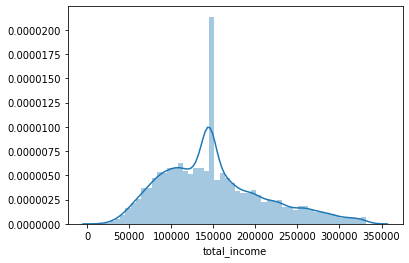

In [145]:
import seaborn as sns

sns_plot = sns.distplot(df[df.total_income < 331516].total_income)
fig = sns_plot.get_figure()

In [144]:
df.quantile(0.95)

children                 2.0
days_employed       378024.1
dob_years               64.0
education_id             1.0
family_status_id         4.0
debt                     1.0
total_income        331516.0
purpose_type_id          3.0
gender_id                1.0
income_type_id           3.0
income_level_id          3.0
purpose_id              36.0
Name: 0.95, dtype: float64